# Машинное обучение, ВМК МГУ

# Практическое задание 4. Optimal Control Reinforcement Learning

## Общая информация
Дата выдачи: 30.04.2024

Мягкий дедлайн: 15.05.2024 5:30 MSK

Жёсткий дедлайн: 22.05.2024 5:30 MSK

## Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). **Максимальная оценка за работу  — 10 баллов.**

Сдавать задание после указанного жёсткого срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи !!ВАЖНО!!!
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-04-ocrl-Username.ipynb


Username — ваша фамилия и имя на латинице именно в таком порядке

<p style="color:#de3815;font-size:25px;">
Напоминание об оформлении и выполнении ноутбука
</p>

* Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть, не запуская ячейки (кроме редких случаев, когда необходимо намеренно скрыть ненужный output, про такие случаи желательно писать пояснения в тексте). **В противном случае -1 балл**
* При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. **В противном случае -1 балл**
* В anytask обязательно нужно прикреплять отдельно файл с расширением ipynb (не в архиве, а именно отдельно). Если необходимо отправить еще какие-то файлы, то вынесите их в отдельный архив (если файлов много) и пришлите. **В противном случае -0.5 балла**
---
* Пишите, пожалуйста, выводы и ответы на вопросы в текстовых ячейках/при помощи print в коде. При их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и **поэтому будем снижать баллы**
* Если алгоритм не сказано реализовывать явно, его всегда можно импортировать из библиотеки.
---
* Про графики. _Штрафы будут применяться к каждому результату команды отображения графика (plt.show() и др. аналогичные). Исключением являются графики, генерируемые функциями каких-либо сторонних библиотек, если их нельзя кастомизировать_

    * должно быть название (plt.title) графика; **В противном случае &ndash; -0.05 балла**
    * на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel); **В противном случае &ndash; -0.025 балла за каждую ось**
    * должны быть подписаны единицы измерения (если это возможно); **В противном случае &ndash; -0.025 балла за каждую ось**
    * все названия должны быть понятны любому человеку, знакомому с терминологией, без заглядывания в код; **В противном случае &ndash; -0.05 балла**
    * подписи тиков на осях не должны сливаться как на одной оси, так и между ними; **В противном случае &ndash; -0.025 балла за каждую ось**
    * если изображено несколько сущностей на одном холсте (например несколько функций), то необходима поясняющая легенда (plt.legend); **В противном случае &ndash; -0.05 балла**
    * все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном); **В противном случае &ndash; -0.05 балла**
    * если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
    * графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.
    * при необходимости улучшения наглядности графиков, можно пользоваться логарифмической шкалой по осям x/y.
    
    
### А также..

* Для удобства поиска вопросов, на которые от вас просят ответа, мы пометили их знаком **(?)**
* Знак **(!)** означает, что выполнение замечания необходимо для **возможности получения полного балла**
* Даем до +0.5 балла за выдающиеся успехи по субъективному мнению проверяющих. Этот **бонус** не апеллируется

## Задание 1 (4 балла): уравнения Рикатти для управления дроном.

Начнем с небольшой разминки: реализация классического алгоритма нахождения оптимального управления для двухмерного дрона. Его динамика уже реализована за вас в файле qudrotor.py. Кроме того, реализована также визуализация его управления.

В качестве описания текущего состояния предлагается использовать вектор из 6-ти элементов [x, dx, y, dy, theta, dtheta]:

*   x - координата центра дрона по x
*   dx - скорость центра дрона по x
*   y - координата центра дрона по y
*   dy - скорость центра дрона по y
*   theta - угол наклона относительно оси x
*   dtheta - угловая скорость

В качестве управления используем вектор из 2 элементов [u1, u2]:

*   u1 - сила тяги левого винта
*   u2 - сила тяги правого винта

Сила измеряется в ньютонах, прикладывается перпендикулярно линии, проведенной между двумя винтами.

Видео и чекпоинты моделей загружены на диск: https://drive.google.com/drive/folders/1U0iL2YJFj-aCkSlhgohKk72QtNWrNMpF?usp=sharing

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib.backends import backend_agg
import matplotlib.pyplot as plt

import quadrotor
import math
import sympy

import matplotlib_inline
%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')

Зададим параметы для дальнейшей работы:

In [22]:
m = 0.6 #масса дрона
r = 0.2 #длина дрона от левого до правого винта, деленная на 2
I = 0.15 #инерция
g = 9.81 #ускорение свободного падения
dt = 0.01 #временной шаг

**Задание 1 (0.2 балла):** для начала проверим что все хорошо работает нормально. Реализуйте две функции-контроллера и проверьте их работу. Функции должны принимать на вход текущее состояние и номер таймстепа. Выдавать функции должны управление.

Первая функция должна давать команду ничего не делать (то есть всегда выдавать нулевое управление)

Вторая должна заставлять дрон висеть в воздухе при условии что он появляется в правильном положении параллельно оси x.

In [23]:
def do_nothing_controller(state, i):
    u = np.array([0, 0])
    return u

def stabilize_controller(state, i):
    # 2F = mg
    F = m * g / 2
    u = np.array([F, F])
    return u

Проверим реализации. В первом случае дрон должен падать вниз, во втором - висеть в точке (0, 0).

In [310]:
N = 1000
x0 = np.zeros([quadrotor.NUMBER_STATES,])
t, x, u = quadrotor.simulate(x0, do_nothing_controller, N, disturbance = False)

quadrotor.animate_robot(x, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAAmS21kYXQAAAKhBgX//53cRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU5IC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENv
cHlsZWZ0IDIwMDMtMjAxOSAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9w
dGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1o
ZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2
IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0
X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE4IGxvb2thaGVhZF90aHJlYWRz
PTMgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9j
b21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0
PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWlu
dD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2Fo
ZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9
NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAAEYRliIQAEP/+94G/MstfIrrJ
cfnnfSyszzzkPHJdia640AAAAwAAAwABSLT6Xkvn/ABMrzzOSI4qENv3AIW7Do3GoO9tv6+3hhxs
FjDrez8ldJrWhywaqXCk+KH7U3Q1FNSr+L6t0E08s/lmE/5N/razebI0XSX3P87gq9t4o5lEwzBv
TdYkhtPMpiDeudM17oCIh+1SHK7nsSwBvRXSp2n2NWaamhBHM3w3CGHLqX6TU7TwrfXfJJPxlpiv
evQ2///LMImSZPYQEkmGSf/vBxZ+qKT1f6Y+0J63snpGv3EooUDnzzlKu+Eyz6TDp+daTObpHINA
Xpos93G02kw7kNbGrthjZwWTxkBlqs/0Ij5tIr0eHs/NC6z+ye0c2i9PUPobZpKDeOU//xKSmm5C
OlryxHR0AMdxBk+9fC65GztemL2EpEcxWmLIgSJlMBhqu4McySrjlAQ8b/8PlPoSmG7jeGBjm4r0
TxtGTwbjnCG5+OBAP9qeI2ZARGhVfSAwF8SYqKOmyq12XzDn2c6cvqYIIqSS/jAJTJ+c90RQXsiy
7wzFrYnaKuWB/uhGJ9XMhQm2ciQ7EJs7POOIb5ezLB375pwpvqX84oeEFoU4P6xjKrDdL3HcbDBM
3pr/+LjGsnJpGfk7IQUzbS495dmX2SvfsNGRWbNtl7+yaGlVrxTlYf6WJMs2HK5fq5+Y9reFaswX
e/J4UFaqGwYiA1VYreegrGE/oMZ5VAsv6CPAdnGmSZ9JK/+Ju1mzjKf3k2CKH5p/9psxN0Xbv1Mi
GUNhbKddJDYUtp6CRd+SkQMOar+czuTUmcAw7lIXgrUZrmEA3ls8bXqQYqu8urb4MqtwHVBMkkyB
T198QuAD/bj8Nc2USE4rqYStOUkbwRoC3rnqMY8UdQ9pxtbBUBfryrvKbl1DKP9JOiMleK3YjvOs
0Lpf6prf7JOJhmx/w6I5x2G9zcXnaSAAHym+AaxIWhivg7QfLmR8NnuLgNnPNk/1Ng5Vbe6agjl4
PuwIVNfoTQs3sdAhdlOA3qIE6EQ6uAhkPgwkckJzt1vFrI6PT5wLoKOkWCMscm7IZN7Dh7c+yeun
CeDlAewSlLJLkeiIZxf8wPY12wE76fsQho7j9etNWZVto9MB9obax3JueQNfL/9pw/+FtHDAXLyI
7JP5OauvIMAss3rnG7IEEv9XG5uO8h97vpoN+CoIk329dCi8Hdamdz9DkTT+eaGOiPKkNl2mYmkw
bF4tbBPUtLuDxlkcfdLpjXWX4KU4lWKixRlRMbFM+IIwXraJJkDBLSLEm9/7OMsPcGrSTk15YjA9
y7966FF4PAL+UhOtxrzCpwOqm2OwxGwdlAv04/k6jAc31p/jaJEFqXsJiNud6MlQryvitciAsPAd
P739wXFUMQuN+dvG3WQWIda6IzaVOY/matV3FhcSwjyGIkALJwAF0jB3j18/fvosjxBe1qT1nait
KhpLTMeME6V4m24VTlvMqPEU+lf/dMvMxZfiGnYmnwinhrx/o6OfRfWWCOjwXVfMJL0UB7rnhon8
FW7F847q11Ndnx57NSbKVqsUkICYX+bw+ZZ5LQlSaDWsh8b8PZ8FX7GTu10kePxqUU58piKu4F8M
9whOqpQ73P8F5/Jg8QERz70xDiWrsf8iclRTxCalkFft2o8TdVgfGl8sWPChBNHq6cVT7p23s6GX
CK9+dLD0czt4zubMuTyXeTNiqb5/g9c0nfv84kcA85BIws5FYkMwH/gIPVMsjLEGj/OSAlbhGjw+
U8P9ncxF726Ex69HRd6mancOucTiPDUvTmmio+GX5XIY6faWUzWHpTpZcgRKs5/OYMNmQxUvRVuE
lti1jOgROnDM5rXjsPxwkWpucSkQs26JeyeVis89MNrFDgIIKW0i21kUfDUHoZd+Jp9eBpH2vIhV
LtqF0cQiNnfGc5jFOzoy4x5MNHXsRNfzGA8tqroNCxzIRVyDn4B82lH5H+RJiHVg1ZrRKhTG/Mkn
Chy4syG26ruMKPK4WrxdArY//t8kJp8FOoH7rqbFnM3CaFk8RQnDjdOLhX8NPiI745GMVkj+eXzt
Yg/4Qoy/B9pPyd/b9ZaCDAwTfN0XQF0Y0E9ExlNRl6v/aAh2b0ct/ZYvzxu4g7vJtRT0/zh0wV4/
gwLOGTs3WhL6Bu+Kq+I/WAxlQ/m4JNw184gXT3PIo6/ocT2jcMRZfmqb0Mq7UbpzROSmqx5vaHOS
H44sOCPTjldlFhWIyf/TXv+bHO+/PDf7JtvYstc15l4YB6ZaElK/OrSd7IC+oWoRUdYRO1MZQw2s
JIqkwAfs2X88IX2TyyusmuAK94zWfpxV84m1lgdTsjtRpZjYdVHk/eQwrv6tr5hPxJpr/ccF66sU
U3QC1Aqj0uOz4Ih2ZoSnyZzGHIo/qupMdS4a/cAAwXJRe6za5uOV+xge1GA2pliZwsE1zhtI5/XO
P4MELqSpMze9mr0rgWRXn5+7Pw46+fkROSQu/IkBzdW+VU3ovQMOl8lfdX5YqqdSYI2MRwPpjH54
Mn6SN9h37vpoIALrIfUl3wbeZcoSF6wsjwHKV3tlHz/jekbSpaxz3+zfLjYIp8shJDE4+vPPmWuC
mXLWFBzbS7LYfef9SZtbZDC4JFw32iT5Ju5tfGQrs4qVK+ihYKYwqv6/87Twjowz+03m9m1etd1c
f7TnO7GkCxmZmlPGJ83ZocNHUnV4yYxRhw4y0upPrstoMniWjUK49xF00G/lUGFnx99h8vQCsUVM
2hkX/yoPmuAAnIAAAAMAAXked6S2bj3tbKiaXGdD4m/LbkNDofzAlAQrAjUApYsk/OuGhSMGV8di
jLExY7RHNa0LIws83gPndX2gWxWqkLWcVIdvPfwfxHmx46wosx2KTIQ3Pu93rHEp/VlNxhl/N/sk
XTk5MjlxPiiZJJ2+DOWL9

In [311]:
N = 1000
x0 = np.zeros([quadrotor.NUMBER_STATES,])
t, x, u = quadrotor.simulate(x0, stabilize_controller, N, disturbance = False)

quadrotor.animate_robot(x, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAAh6W1kYXQAAAKhBgX//53cRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU5IC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENv
cHlsZWZ0IDIwMDMtMjAxOSAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9w
dGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1o
ZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2
IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0
X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE4IGxvb2thaGVhZF90aHJlYWRz
PTMgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9j
b21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0
PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWlu
dD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2Fo
ZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9
NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAAEmRliIQAEf/+94gfMstp+TrX
chHnrS6tH1DuRnFepL3+IAAAAwAAAwACHnT2/WY3+YBnSlqCtB10zo0UNR0S/kkboxDzycsZJfiS
Eic+5wIlfGBC9+6cQoTnxFAn+ya6avhMZX3FK95npiew+fP0+rLyGWScdEvuf53BV7bxRzKp6vyH
c4gQWKy/E/D+9EvKSrcRD9qkcdSYzjZmzHW8ur0/GaIH7MjZwhi6G7tZi4Qy6b6Yr8sJ0XXX1b1L
Ew/jjY8ha89N/5xDof+5wmiXdkWQUP4PT8VRSfP/U9Ukidl1XlF+MDFFEZd31jR3wmZ3H9Y1SqgW
sraz/vsRxPegphqSgXTgjmu3Mj3fI2cFk8ZiUIMH+vS/No//wU3z8QXWyCcVCPN1+n1xbmc2NHS2
sf+JiKMB4v0teWI6OgBjuIMtBXxh8Oy6oV2m/usm+26DQSuG9vnS4kQ8ZcyinAAAfM6u733/joSi
v1XDnEjQAAA2blqiKlC8CiVdTHttSC7QGFb/GE0AtRuCcvKdaBpJroNMEEVJJfxgEpl6CElDML2R
Zd4Zi1sWYZMcIviskR/1cyFCbZyI9E8jb17n1KcMWpYO/fXJyWUAWSlzBghHKFfpYzScpGjiibTy
2Npk9sC79zLk0jPydkIKZtys/bEMyEGJQp+f/cuOb1nS6VUS6v6HPiBrNDp2i5lZhztD0LW0K9Co
9VY7Z35jQXBDdU27IKanKNLNAtz3iVh+eTfMgPrVyukwFINpRA7us5mnqQhhyjLsRPM2p+iOviLn
ohG1MBZSwgCYzmBUgbwtnrrB/syBmEGTTU7ETl9t1I4X8w2QJbjsBhK8NopNBtJfWMDiWTqbeucb
sgWSETOXF2L8XHxbmyeOhAR36PHDcg2Ai6+Pp6jGPFHQmGomrPI+Z+RLDym5dQykciiIOP/7jyb6
OjwwAAADAAADAAAEuU5Ib/qKOH8wpD5cyPhs9xcBs55qifPhTC2qT9NdrbA7q95X0rjcXW+x0CF2
U5d1rJZNqnoePAQyHwYSOWYzk97Vsjo9PnAugo6PXecvm/F5aDJ0jBfjy5OXkEws4Jtzi80sYKpM
CLd4o2ddsBO+n7EIaZgwum4h5IGEQ3VKzuwXCh5qicplC8unOVjgHwaFQe/yeO6FckulH6oWWilO
BEvfZ2ET/+0EvJPGfCV21pLtW6997dxWoASdnslgRkbAzB1hmbkkVKvZatNhovji0q4j/BD5J6nW
fpVJnS4DzD+Bnnn4SOPST/I+7mCMhrxruiSZAzvgrlHj/gYaOmjB9gvEfVn7P9QLjmrnXx9QovB4
BUNLN+wa9wWPUzEbE/yCnIP6RL/5cmygSLuWJK+3rhsi7iMGCPen1oRUDpjj9Hv/U+HEUJgrCcHJ
Ywa38DuXFwP5tgjGDR4Ur7dPF4Tivof6H0aY0ggXzRpyAcACNjGHagAtiSWdCgkCY2NILPZIVhqQ
IlycCeA7lNjHjFev6AuaUGOZs0RYbvh81PjGfn/+6fNgFy/EN7pTf4RTw15I5dHPovrLBHR4Lquu
RWeKdERaLAAZINJdMDaCEwRTpdn2IP+0/f/bQCZfj/h1QWfOUebNjIhXHtBv5DjTKIDJqsMnFabO
thBBij+58BDPOE8Vs19SZuxEBELHlPRyEVfMApqrRbrh5q+bhbMxZmQATpjgLHPYk3gEDMwart0h
NZAGAhx7w+B5miOzJb8A7Lk8TQsZdHi/KWc6yCv3ntdnEm4IFrD/wGFaDNSO2maP85IFa/H8YOyE
jklTDEXvboe3r0dGVY2SdWIyHvoWJ7jkst9vMAW+/R/y50IyER2Lk8st5jipi6Tn62czY5yF2dB2
tFVSrmuRvLFeL85Io3xfdbENMPlJ1rjEQGIMXRgiWFM8+GlzOmvyOtu6tPVfR68sFPe66yPe2Rmb
R3LlT6woInMAlrOx7PtkisTyD9dZ4XrOc9Bu3rx+OCjSuS7GKD1M3fOqHz9fqO5yXkFsaSRf6Ul4
EQsSJfnS/AOv09n21sXBNO8fAQ1LfF09KgEwxOFOyXeXanXnMeCgriAfJojEWbSboKIr7FX/jk/T
KDedubCjhsselGr4k31nUfGDuMHowa/QuylDW6nASwObf0VekCLMO9bK51Nd3zuds4ULJcb27LOD
CYOQJr4gD5i6QWz5AVDKy4WQ9hx2Di+wEibzaeVj7kU/rhW3RNmPwFd5KRseyxTF9xtpoUvk0y6J
aiQhYQAjYKTcluNP64Zb9zBLJKhBKBxlju7SpGsoCP30+PXSIIqs46e2UPmnrneXBwwa+i5SLnpy
jQ/NlHrq9TNFAXz8b2UNDKI5yBwmW49TgGIEB2qerMAgo/piRfxcdWXqdhvi6kedFTbHfwoaNy4J
sjKyokPVDayjolCflUZDHVnu1AoqlTx7E8GX5cciMJ+FW0I8o/Hsf9609odPmHoNDVo35EuWaFye
l9JLWsIgbs4PT+17D8AJ3tjdaRPWTUg4lT0xltBFjljOpolEuxjsSrIRt1PdBv26SQz8Y4v0+ijm
ySRVJf/CKd1T8gRLCqZOgaM0f6h7L/WLgYFgPYjKh4EKC909pxPCREKXAI49vmE/EnAE7Vbe3F5w
nfTGqzV/Evu3+XvRJF8aVRI/hmvfuKfAEN09YA+u9xtamkiAAF6pSrJ+j3AwOfinGHPvQrxAYzRD
He3TMjzfMsCuH+p2My6aO3q35lCD3jVzLrtst6X5SebgXdY7D67MbgjPkGXn2Xi30lvQ0VT36hMb
bFzhrt2fsYsqHGg/0q+xNVij12zgoVx75RyTyw4M5Fe3e8itLMRtY075/QRY8QKZXA7SIosXmVDy
soCcicKFfYQ0WM2XPeeMknvHseT6+/gEWlFpEAfAbXftCFGE5wDgoVJB68UmnwDi8YRli47XSiYb
jBCX5+TBhjy+USsvQLXR8

**Задание 2 (1.5 баллов):** Как вы помните, уравнения Рикатти как и базовый алгоритм ПМП удобнее всего реализовывать для задачи типа LQR. Однако, она имеет 2 требования, которые не выполняются в нашей задаче.

Требование 1: динамика должна выглядеть следующим образом:
$x_{k+1} = Ax_k + Bu_k$.

Требование 2: функция потерь должна выглядеть следующим образом:
$cost(x,u) = x^TQx + uRu$


Для нашей задачи выписать подобные матрицы в общем случае невозможно. Попробуем нашу динамику аппроксимировать линейной в каждой точке.

Требование 2 не выполняется, так как нам в теории хочется чтобы дрон оказался в конкретной точке. То есть, хочется минимизировать такой лосс: $cost(x,u) = (x-x^*)^TQ(x-x^*) + (u-u^*)^TR(u-u^*)$. Самый простой выход в нашем случае - решать задачу в терминах расстояний до конечной точки (то есть, новый вектор наблюдений - $\overline{x} = (x-x^*), \overline{u}=(u-u^*)$

1. Выпишите аппроксимацию функции (пока без А и В, просто через приращения) $f(x,u)$, где $x_{n+1} = f(x_n, u_n)$. Keywords: второй закон Ньютона, линейное и угловое ускорение стержня, здравый смысл

2. С помощью разложения в ряд Тейлора в окрестности $x^*, u^*$ выведите функцию $\overline{f}: \overline{x}_{n+1} = \overline{f}(\overline{x}_{n}, \overline{u}_{n}) = A\overline{x}_{n} + B\overline{u}_{n}$

3. Запрограммируйте подсчет этих матриц

**Решение:**

Пусть $\vec{x}_{n + 1} = f (\vec{x}_{n}, \vec{u}_{n})$,  $\;\vec{x} = (x, \, \dot{x}, \, y, \, \dot{y}, \, \theta, \, \dot{\theta}), \; \vec{u} = (u_1, \, u_2) \equiv (F_1, \, F_2).$

Будем считать, что $\theta$ - угол между осью $Ox$ и дроном, отсчитываемый против часовой стрелки.

Запишем второй закон Ньютона в проекциях на оси $Ox$ и $Oy$:

$$ Ox: \; m\ddot{x} = -(u_1 + u_2)\sin(\theta); $$
$$ Oy: \; m\ddot{y} = -mg + (u_1 + u_2)\cos(\theta). $$

Тогда получим:

$$ \ddot{x} = -\dfrac{u_1 + u_2}{m}\sin(\theta); $$
$$ \ddot{y} = \dfrac{u_1 + u_2}{m}\cos(\theta) - g. $$

Также из формулы $M = I\ddot{\theta},\;$ где момент равнодействующей силы $M = \sum\limits_i F_i l_i$, $\;l_i$ - плечо силы $F_i,$ $I$ - момент инерции, $\ddot{\theta}$ - угловое ускорение, находим

$$ \ddot{\theta} = \dfrac{M}{I} = \dfrac{r \left(u_2 - u_1 \right)}{I}.$$

Аппроксимируя производную разностной схемой, получаем:

$$
\begin{cases}
x_{n+1} = x_n + \dot{x}_n \Delta t; \\
\dot{x}_{n+1} = \dot{x}_n + \ddot{x}_n \Delta t; \\
y_{n+1} = y_n + \dot{y}_n \Delta t; \\ 
\dot{y}_{n+1} = \dot{y}_n + \ddot{y}_n \Delta t; \\
\theta_{n+1} = \theta_n + \dot{\theta}_n \Delta t; \\
\dot{\theta}_{n+1} = \dot{\theta}_n + \ddot{\theta}_n \Delta t.
\end{cases}
$$

Таким образом, функция $f$ будет иметь вид

$$
f(\vec{x}, \vec{u}) =
\begin{bmatrix}
x + \dot{x} \Delta t \\
\dot{x} + \ddot{x} \Delta t \\
y + \dot{y} \Delta t \\ 
\dot{y} + \ddot{y} \Delta t \\
\theta + \dot{\theta} \Delta t \\
\dot{\theta} + \ddot{\theta} \Delta t
\end{bmatrix} =
\begin{bmatrix}
x + \dot{x} \Delta t \\
\dot{x} - \dfrac{u_1 + u_2}{m}\sin(\theta) \Delta t \\
y + \dot{y} \Delta t \\ 
\dot{y} + \left(\dfrac{u_1 + u_2}{m}\cos(\theta) - g\right) \Delta t \\
\theta + \dot{\theta} \Delta t \\
\dot{\theta} + \dfrac{ r\left(u_2 - u_1 \right)}{I} \Delta t
\end{bmatrix}
$$

Пусть $(x^*, u^*)$ - некоторый допустимый процесс. По формуле Тейлора получим:

$$ f(\vec{x}, \vec{u}) \approx f(x^*, u^*) +  \dfrac{\partial f}{\partial \vec{x}}(x^*, u^*)(\vec{x} - x^*) +  \dfrac{\partial f}{\partial \vec{u}}(x^*, u^*)(\vec{u} - u^*) $$

Введем обозначения $\overline{x} = \vec{x} - x^*, \; \overline{u} = \vec{u} - u^*.$ Пусть $g(\overline{x}, \overline{u}) = f(x^*, u^*) + A\overline{x} + B\overline{u},$ где

$$ A =  \dfrac{\partial f}{\partial \vec{x}}(x^*, u^*) = 
\begin{bmatrix}
1 & \Delta t & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & -\dfrac{u_1^* + u_2^*}{m} \cos(\theta^*)\Delta t & 0 \\
0 & 0 & 1 & \Delta t & 0 & 0 \\
0 & 0 & 0 & 1 & -\dfrac{u_1^* + u_2^*}{m} \sin(\theta^*)\Delta t & 0 \\
0 & 0 & 0 & 0 & 1 & \Delta t \\
0 & 0 & 0 & 0 & 0 & 1 \\
\end{bmatrix} \in \mathbb{R}^{6 \times 6};$$

$$ B =  \dfrac{\partial f}{\partial \vec{u}}(x^*, u^*) = 
\begin{bmatrix}
0 & 0 \\
-\dfrac{\sin(\theta^*)\Delta t}{m} & -\dfrac{\sin(\theta^*)\Delta t}{m} \\
0 & 0 \\
\dfrac{\cos(\theta^*)\Delta t}{m} & \dfrac{\cos(\theta^*)\Delta t}{m} \\
0 & 0 \\
-\dfrac{r \Delta t}{I} & \dfrac{r \Delta t}{I} 
\end{bmatrix} \in \mathbb{R}^{6 \times 2}. $$

Т.к. $g(\overline{x}, \overline{u}) \approx f(\vec{x}, \vec{u})$, то будем считать, что $\vec{x}_{n+1} = g(\overline{x}_n, \overline{u}_n) =  f(x^*_n, u^*_n) + A\overline{x}_n + B\overline{u}_n = x^*_{n+1} + A\overline{x}_n + B\overline{u}_n$. То есть

$$ \overline{x}_{n+1} =  A\overline{x}_n + B\overline{u}_n.$$

In [24]:
def get_linearization(z, u):
    m = 0.6 #масса
    r = 0.2 #длина, деленная на 2
    I = 0.15 #инерция
    g = 9.81 #ускорение свободного падения
    dt = 0.01 #временной промежуток

    u1, u2 = u
    theta = z[4]
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    
    A = np.array([
        [1, dt, 0, 0, 0, 0],
        [0, 1, 0, 0, - (u1 + u2) * cos_theta * dt / m, 0],
        [0, 0, 1, dt, 0, 0],
        [0, 0, 0, 1, - (u1 + u2) * sin_theta * dt / m, 0],
        [0, 0, 0, 0, 1, dt],
        [0, 0, 0, 0, 0, 1]
    ])
    B = np.array([
        np.zeros(2),
        np.full(2, - sin_theta * dt / m),
        np.zeros(2),
        np.full(2, cos_theta * dt / m),
        np.zeros(2),
        [-r * dt / I, r * dt / I]
    ])
    return A, B

**Задание 2. (0.3 балла)**: теперь перейдем к оптимизируемому функционалу. На семинаре рассматривался функционал как сумма функций потерь для каждой точки.

Не забываем что для удобства вычислений задача решается для относительных состояний и управлений


Ограничим рассматриваемый горизонт 1000 шагами и сгенерируем целевые состояния для каждого момента времени

In [25]:
from copy import copy

In [26]:
xstar=[]
for i in range(0, 1000):
    if i >= 0 and i <= 450:
        goal=np.array([[3],[0],[3],[0],[0],[0]]) # хотим чтобы за первые 450 шагов он оказался в точке (3,3)
        xstar.append(copy(goal))
    if i >= 451 and i <= 550:
        goal=np.array([[3],[0],[3],[0],[np.pi/2],[0]]) # теперь говорим ему встасть перпендикулярно оси х чтобы дестабилизировать свое положение
        xstar.append(copy(goal))
    if i >= 551 and i <= 1000:
        goal=np.array([[0],[0],[0],[0],[0],[0]]) # говорим ему вернуться на исходную позицию
        xstar.append(copy(goal))
xstar = np.array(xstar).reshape(1000,6,).T
xstar.shape

(6, 1000)

По умолчанию мы хотим чтобы дрон висел стабильно в воздухе, поэтому $u^*$ - это управление-стабилизатор.

Реализуйте функцию подсчета потерь по формулам с семинара. $Q$ возьмите равной $I*10000, R = I*0.0001$

In [27]:
def cost_function(x, u):
    sqrt_Q = 100 * np.eye(6)
    sqrt_R = 0.01 * np.eye(2)
    u_star = stabilize_controller(None, None)
    x_overline = x - xstar
    u_overline = u - u_star.reshape(-1, 1)
    cost = np.linalg.norm(sqrt_Q @ x_overline, ord="fro") ** 2 + np.linalg.norm(sqrt_R @ u_overline, ord="fro") ** 2
    return cost

**Задание 3. (2 балла):** реализуйте полный прогон уравнений Рикатти для 1000 шагов. Вам понадобится получасть матрицы A и B на каждом шаге для вычисления управления. Функция должна возвращать список из матриц K и P.

In [28]:
def back_Riccati(x, u, i):
    N = 1000
    Q = 10_000 * np.eye(6)
    R = 0.0001 * np.eye(2)
    K = []
    P = []
    
    u_stab = stabilize_controller(None, None)
    P.append(Q)
    for _ in range(N - 1, 0, -1):
        A, B = get_linearization(x - xstar[:, i], u - u_stab)
        K.append( np.linalg.inv(R + B.T @ P[-1] @ B) @ B.T @ P[-1] @ A )
        P.append( Q + A.T @ P[-1] @ (A - B @ K[-1]) )

    K = K[::-1]
    P = P[::-1]
    
    return K, P

In [273]:
#K, P = back_Riccati()

Реализуйте генерацию управления с помощью полученного массива матриц K. Помните что мы решаем задачу в терминах относительного состояния и аппроксимированных матриц A и B. Поэтому, к вычисленному по формулам с семинара управлению требуется прибавить стабилизатор.

In [29]:
u_stab = stabilize_controller(None, None)    
x0 = np.zeros(6)

x = [x0]
u = [u_stab]

for i in range(1, 1000):
    A, B = get_linearization(x[-1] - xstar[:, i], u[-1] - u_stab)
    K = back_Riccati(x[-1], u[-1], i)[0][0]

    x_new = A @ x[-1] + B @ u[-1]
    u_new = -K @ (x_new - xstar[:, i]) + u_stab
    x.append(x_new)
    u.append(u_new)

x = np.array(x).T
u = np.array(u).T

x.shape, u.shape

((6, 1000), (2, 1000))

In [30]:
np.unique(x).shape[0], np.unique(u).shape[0]

(5988, 1998)

In [31]:
print(cost_function(x, u))
print(cost_function(np.zeros_like(xstar), np.full(u.shape, m * g / 2)) - cost_function(x, u))

98127080.88210289
3520320.218169436


In [32]:
np.max(x[0, :]), np.max(x[2, :])

(4.905549375665992, 3.0617643827893297)

Проверьте управление. Для получения полного балла необходимо чтобы дрон прилетал  в точку (3, 3), и возвращался в (0, 0). ВЕКТОР ЦЕЛЕВЫХ СОСТОЯНИЙ xstar МЕНЯТЬ ЗАПРЕЩЕНО

In [33]:
quadrotor.animate_robot(x, u, xlim=[-2, 6])

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAABnoW1kYXQAAAKhBgX//53cRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU5IC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENv
cHlsZWZ0IDIwMDMtMjAxOSAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9w
dGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1o
ZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2
IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0
X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE4IGxvb2thaGVhZF90aHJlYWRz
PTMgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9j
b21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0
PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWlu
dD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2Fo
ZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9
NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAAEZNliIQAP//+92ifAptaQ3qA
5JXFJdtPgf+rZ3B8j+kDAAADAAADAAAVyyel5L5/wAdKxn/fJHJ0OhhBNFkv5JG4hWfwxy3RjVIZ
F5c2Qh4JAQh/dzXefgGC9D9qbn7SmpV/F9W6Cabq9KzCf8m/1tZvNkIjRL7n+dwVe28UcyhcDo8B
OYlISsvxPs8g3o1Uq3EQ/apFFdv0JT49ospX0rN7U7sNzOvTnmLhDQ0R5Qhji+micXRY3Q0rhoa9
v/kLIUvMeNcl3y15+f+Diz9UUkh/0i8SNQUbuC167cuKAQfx5ht2S9mMAmdsrO+UlRMghXjQyOxw
X1y3G0w2cFYwE4KuT9LtSma0lyJGNUkfnDGVZmgfXgjjh7P+bGi68EAWmpcHMlsfdD1GN7ic/wRN
yiNqjZfRqp4Kk9/Rt4/9sSB43PZTX0OoMQRDkZDbrMGBN5b9sxumSi5Eb1oODjyg8TsKEVCDY7Lm
YKWDEJx5Ikb2mMRa5tn4x+k53wMvBWlUf1q5YP57B14Tq118JPgyE3HR12kv8b/MVOYqZtgZOwuJ
RPEdrJhnsiNIfOnaXaM69927HSKxzCXCXm6X2a7B8GQJJAlXaSXnO6NPeZIyAm0Y9m7RhvcDeRzS
wp69SKhEaHU/E8hLb3m7TofR60gmFhvGnZmx8aofrZ5AVQ8yzPZDBChtas+wUo/jdM0FSbo7DEvV
eUnCxm3Ik8KMFzWMlcV6SerlCIq+eB59mjhatqDiLObWIlL1OCbq9aaJkhTMwuP0SC7byB5WJEL2
zQQf9XSQ2FLaegk8rZ+n6cHmyXXJefXBjP8AWFYDm5FidslsYgQDw9tY9PvNdEMWKJ32KerlCTTq
OrewQ+4uAKJ5Janw8JAAkVrr4P55omUPzT/7T1GbE8voGrwqNKbl1DKQHKnV0DZbbIQM2IoAAAMA
B0AAAAMDYS1owNzoaz4O0Hy5kfDZ7i4DZzzZ59uyIVW3umoI5eEksCFTX6E0LN7HQIXZTiFqZrAo
gJ2ikMh8GEjkf96fnmFdaZyYrHbf4YTx7cIg3ZDJvYcPoP2UVOYTO9ChpxhxeaWMFUmBF4MB7Gu2
AnfT9iENHiXr1HhvrG2AtS2fmLKj8n8tDAF6Av2nDcfUbpnasNVyPP+KuES7fRYr0k9XKBCz/OCX
pSxkmfE5QY6RwktvC8IQt5wa//MMQlQRPVvEgYfUN3QF9+chD7L0sxl1lW6XlO3F8WHEgeVgEvt6
gYDk0L2nsuNei55LhbrmMWDUvHD6t1qM9haOLKck/oPWqrZuWVEPqJK8kW8fT9VZY9mYQfl7LXbY
1dKvJTcsnS5eAd8Dw/KILTE67VmjP4284JKsqCiUrnejJUK8rXN7fWR76HYEF/deKdIuitKyvYj5
YnZParWR/NHZZSbiliDp1lAADH8EvYq/Z5ACVbfn/qwk5bFxlkRH6ZuhWGpAiXJwJ4DuUpp9mK9f
0Bc0oMczYxiw3eNUK94d/yJM3b/q7JNEoOWO0quMf4+lkWoY/VLEMPDMFfiOkCx5fwxD1vn67Frt
JzfCcjnEQsBDpmGnlsQv83LI2fqgunSTMby4/J2aU0kZtSxTnqYsnqGeAcAdw1pyZPmZY15/OTv4
avpZELSICDS9iadXwAqJjiYk3t/hmPQXg2wVobyh/mefEVIN96zru1joGXensANtDWoXsfwL2FCS
4CeEUJQ4rlgKu81bTwoZWSdRXLdCmKNDpNBpZFKNB0Q30nYl97OfVpXiU80O8rOIHW+Ml4Tr4KEY
EYse6+FVF/zk/jDV3NFR8Mvyt7n7tyaIhMGiTYq9LETxTr74KIcPDGakYBVlxx7WrFg9RQ5ypUan
ok0cProgUoPPeWCZsoMGCYF1wg31VDUd94fcyktsT9EAtP1Avbh6FWD/F0p9rgN2iVQD2cHatvun
l6cMJSQAaNFEdRn0l/I8yk6a3LeSsVlutvGm2wZHP9+AhP3sYpim9TbsAAupA9AXONdYybMEDXzD
w/Ts2KtU/XBSQkXKExtxNu/wyB3sbXV2vQauGmLX+NgQSL1vm7y2m9CQK4EtlD72LLYrAZobfRVC
WQ1lHpmW8qIy0H5xNYf8vfnYYNd4A5GJ1zINEWyZjLJw2MCUirx8CKBcg0IwhIu5yPi3lUdLjsNH
GFi4AqNTPrKmlBgUmWwAOXKaXRHuXbZpv1L/HOc5zRBo8P9JxdwLyocOd2rDU3q2mdd0MwjdFCn5
rQhQuEFh9chfQJwGcRDt0BYPQkl1wzWy50OIBsartj1w0aE0GbvCMT2odreqllXKugo1FCE/M2EA
HfwHyYJes5nWgZE2LbAqK533RRLeMbabXgQCcO86FDqlsvaWtN6J+5kF07ImKAC6RncHzBEXFa4K
Ye0iaIgX12lzCFh1eGD8fh3yrL+84LW5KzBTl/F1ITqAqA0DjqJ7aTUZx9LGEiNnCPlTAc6aXO6z
2UXJmFl7T2CeGqR858XSfpBKlSjAfzq4ouYXYyUnbOgwAGXBVLVZY/VBcHuTk6QWY2MeaDBymeFV
wuvW/4K89MIIIUJSzG/q6ZWYXosniyeYW7TuaNX7xIpK12h7zM3pwpEL86TtLUwAWDbIL/7tnMws
0m9XyGEyFmYyHoCpNkwUCIVVSXCo4mxJQjzzNuc70BVId+WP3uQZWpYYFzlvKZb2tqK/Io0W8qrv
5UqWH2fzbJ3jFt38GnrNLNFqOnx+2ckqA+5GCSeK15tbhi47XRtx7z6N27KeH4r1+LJKoX9jwb4n
2Iv+cgfSmBylQo/N2aHDRyfAZjkDDi9BHNzDx+gE+6Ofed0f542S/U1QnHB5lL/MUOTByU7wXV80
sE1LYzRGll0zLwAAAwAGKAAAAwCG/Vl1jdvuwhjzuWGpj4m/LbkNDofzAnMt8i0UApYsk/KTCWkY
Mr47FGWJifxAVBZEaH+ID

## Задание 2 (6 баллов): уравнение Беллмана

Теперь рассмотрим 1 из популярных в наши дни методов обучения с подкреплением: A2C. Для реализиции будем использовать популярную в наше время библиотеку RL-щиков [gymnasium](https://gymnasium.farama.org/content/basic_usage/).

Произведем настройку окружения

In [4]:
import sys, os
if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/setup_colab.sh -O- | bash
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/week02_value_based/mdp.py
    !touch .setup_complete

# This code creates a virtual display to draw game images on.
# It will have no effect if your machine has a monitor.
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ['DISPLAY'] = ':1'

/bin/bash: ../xvfb: No such file or directory


In [308]:
#!pip install swig
#!pip install gymnasium[toy_text,classic_control,box2d]

Алгоритм будем исследовать на примере задачи [cartpole](https://gymnasium.farama.org/environments/classic_control/cart_pole/).

gymnasium предоставляет возможность работать с симуляциями окружающих сред для разных задач. Прочитайте комментарии к коду в следующей ячейке.

C:\Users\valer\anaconda3\lib\site-packages\gymnasium\envs\registration.py:513: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(


Выход функции step: (array([ 0.01288518, -0.19192804,  0.00601176,  0.24816151], dtype=float32), 1.0, False, False, {})
state vector dim = 4
n_actions = 2


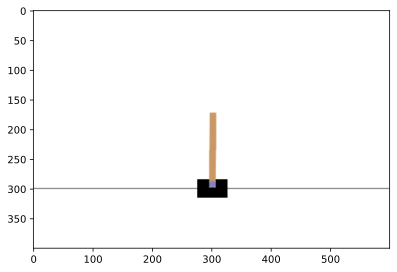

In [5]:
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import gymnasium as gym

# if you see "<classname> has no attribute .env", remove .env or update gym
env = gym.make("CartPole-v0", render_mode="rgb_array").env # так создается симулятов окружения

env.reset() # сбрасываем параметры симулятора (устанавливаем прошедшее всемя с начала эпизода на 0, накопленную награду на 0, сбрасываются параметры инерции)
n_actions = env.action_space.n # получаем количество возможных действий управления
state_dim = env.observation_space.shape[0] # получаем размерность вектора наблюдений
print('Выход функции step:', env.step(0)) #для того чтобы сделать шаг симуляции есть функция step, принимающая на вход действие и возвращающая следующее состояние, награду, индикатор окончания эпизода и дополнительную иннформацию
plt.imshow(env.render()) #render отрисовывает окружающую среду в формате пригодном для подачи в функцию imshow
print("state vector dim =", state_dim)
print("n_actions =", n_actions)

env.close() #останавливаем симуляцию

In [6]:
import os
from itertools import count
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Categorical

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

device, state_size, action_size

(device(type='cuda'), 4, 2)

Напомним суть метода A2C:

Есть 2 нейронный сети: Actor и Critic. Critic - по-сути функция Беллмана, которую обучают под дискретное уравнение Беллмана.

Actor - политика, которую мы обучает максимизировать функцию Беллмана.



Создайте 2 вышеупомянутые нейросети. Для нашей задачи хватит 2-3 линейных слоя в каждой. Так как пространство действий дискретно, вам  надо будет пробросить градиент через семплирование с вероятностями. В этом вам поможет torch.distributions.Categorical как возвращаемое значение Actor

In [8]:
class Actor(nn.Module):
    def __init__(self, state_size, action_size, hidden_dim=256):
        super(Actor, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(state_size, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, action_size),
            nn.Softmax(dim=-1)
        )

    def forward(self, state):
        probs = self.network(state)
        return Categorical(probs)


class Critic(nn.Module):
    def __init__(self, state_size, action_size=None, hidden_dim=256):
        super(Critic, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(state_size, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1)
        )

    def forward(self, state):
        return self.network(state)
        

Теперь для удобства реализуем функцию compute_returns, вычисляющую значения Q - функции. На вход она получает список rewards наград, получаемых на каждом шаге куска траектории, next_state - выход критика в последнем состоянии траектории. При обучении мы будем последовательно генерировать кусок траектории фиксированной длины (из соображений удобства). На выходе вы должны получить оценку Q-функции. Нам никто не гарантирует что эпизод не закончится раньше чем закончится генерция траектории. Например, N = 20, а на 10 эпизоде у нас маятник уже упал. gymnasium в таком случае автоматически запускает новый эпизод и при следующем вызове step эпизод будет уже новый. Для этого, в функцию передается параметр dones, являющийся списком длины N, содержащий индикаторы того, завершился ли эпизод на соответствующем шаге. Соответственно, для оценок Q-функции на куске уже траектории, известной до последнего эпизода, прибавлять V-функцию не нужно, так как мы и так знаем все награды до самого конца.

Реализуйте функцию compute_returns.

In [9]:
def compute_Q(next_value, rewards, dones, gamma=0.99):
    Q = next_value
    Q_list = []
    
    for reward, done in zip(reversed(rewards), reversed(dones)):
        if not done:
            Q = gamma * Q + reward
        else:
            Q = reward
        Q_list.append(Q)

    Q_list = Q_list[::-1]
    return Q_list

Теперь реализуйте итерацию обучения. Напомним формулы:


$L_{actor} = -\frac{1}{MN} \sum_{m=0}^M \sum_{t=0}^N log(π(a_t^m|s_t^m))A(a_t^m, s_t^m)$

$L_{critic} = \frac{1}{MN} \sum_{m=0}^M \sum_{t=0}^N (V(s_t^m) - y(s_t^m, a_t^m))^2$

$y(s_t^m, a_t^m) = \sum_{t'=t}^{N-1} γ^{t'-t} r(s_{t'}, a_{t'}) + γ^{N-t} V(s_N) $

In [354]:
def trainIters(actor, critic, n_iters, n_steps=1000):
    #создайте оптимизаторы для Actor и Critic
    optimizerActor = optim.Adam(actor.parameters(), lr=0.001)
    optimizerCritic = optim.Adam(critic.parameters(), lr=0.001)

    actor.train()
    critic.train()

    env = gym.make("CartPole-v0", render_mode="rgb_array").env

    for it in range(n_iters):
        #обнулите окружение и получите первое состояние
        next_state = env.reset()[0]
        #переменные для накопления всего накапливаемого
        log_probs = []
        values = []
        rewards = []
        dones = []

        #цикл по шагам в эпизоде
        for i in range(n_steps):
            env.render()

            #получите действие и значение V - функции в текущем состоянии state
            state = torch.tensor(next_state).to(device)
            distrib = actor(state)
            action = distrib.sample()
            V_value = critic(state)

            #шаг симулятора
            next_state, reward, done, truncated, _ = env.step(action.item())

            #накапливаем логарифмы вероятностей, значения v-функции, действия, награды, индикаторы завершения эпизода
            log_probs.append(distrib.log_prob(action))
            values.append(V_value)
            rewards.append(reward)
            dones.append(done)

            if done:
                print('Iteration: {}, Score: {}'.format(it, i))
                next_state = env.reset()[0]


        #получите значение V - функции в последнем состоянии (параметр next_state)
        state = torch.tensor(next_state).to(device)
        V_value = critic(state).item()

        log_probs = torch.stack(log_probs)
        values = torch.stack(values)

        #вычислите Q-функции
        Q_values = torch.tensor(compute_Q(V_value, rewards, dones), device=device)

        #вычислите advantage
        advantage = Q_values - values

        #вычислите actor_loss
        actor_loss = -torch.mean(log_probs * advantage.detach())

        #вычислите critic_loss
        critic_loss = torch.mean(advantage.pow(2))

        #сделайте шаг оптимизации critic_loss
        optimizerActor.zero_grad()
        optimizerCritic.zero_grad()
        actor_loss.backward()
        critic_loss.backward()
        optimizerActor.step()
        optimizerCritic.step()

    torch.save(actor, 'actor.pkl')
    torch.save(critic, 'critic.pkl')
    env.close()

actor = Actor(state_size, action_size).to(device)
critic = Critic(state_size, action_size).to(device)
trainIters(actor, critic, n_iters=500)

Iteration: 0, Score: 31
Iteration: 0, Score: 56
Iteration: 0, Score: 67
Iteration: 0, Score: 83
Iteration: 0, Score: 94
Iteration: 0, Score: 109
Iteration: 0, Score: 130
Iteration: 0, Score: 152
Iteration: 0, Score: 167
Iteration: 0, Score: 184
Iteration: 0, Score: 207
Iteration: 0, Score: 220
Iteration: 0, Score: 237
Iteration: 0, Score: 260
Iteration: 0, Score: 280
Iteration: 0, Score: 299
Iteration: 0, Score: 322
Iteration: 0, Score: 334
Iteration: 0, Score: 346
Iteration: 0, Score: 365
Iteration: 0, Score: 381
Iteration: 0, Score: 420
Iteration: 0, Score: 436
Iteration: 0, Score: 453
Iteration: 0, Score: 474
Iteration: 0, Score: 487
Iteration: 0, Score: 528
Iteration: 0, Score: 572
Iteration: 0, Score: 587
Iteration: 0, Score: 622
Iteration: 0, Score: 657
Iteration: 0, Score: 669
Iteration: 0, Score: 678
Iteration: 0, Score: 688
Iteration: 0, Score: 705
Iteration: 0, Score: 718
Iteration: 0, Score: 728
Iteration: 0, Score: 742
Iteration: 0, Score: 768
Iteration: 0, Score: 789
Itera

Проверьте обученные сети. Награда после завершения эпизода должна быть стабильно больше 300. Можно менять количество эпох обучения

In [361]:
#для тестирования скопируйте цикл for из предыдущей ячейки сюда, удалите логгирования, замените range(N) на count() (тогда он будет бесконечно итерироваться) и в if done запихните break.
#Прогонить эпизод несколько раз

MAX_STEPS = 20_000

actor.eval()
critic.eval()

env = gym.make("CartPole-v0", render_mode="rgb_array").env

for it in range(7):
    next_state = env.reset()[0]
    
    #цикл по шагам в эпизоде
    for i in count():
        env.render()
        state = torch.tensor(next_state).to(device)
        distrib = actor(state)
        action = distrib.sample()
    
        #шаг симулятора
        next_state, reward, done, truncated, _ = env.step(action.item())
    
        if done or i >= MAX_STEPS:
            print('Iteration: {}, Score: {}'.format(it, i))
            break
            
env.close()

Iteration: 0, Score: 20000
Iteration: 1, Score: 20000
Iteration: 2, Score: 20000
Iteration: 3, Score: 20000
Iteration: 4, Score: 20000
Iteration: 5, Score: 20000
Iteration: 6, Score: 20000


Реализуем функцию для записи траекторий.

In [19]:
def generate_session(env, agent, t_max=1000):
    """
    Play a single game using agent neural network.
    Terminate when game finishes or after :t_max: steps
    """
    states, actions = [], []
    total_reward = 0

    next_state = env.reset()[0]

    for t in range(t_max):
        state = torch.tensor(next_state).to(device)
        distrib = agent(state)
        a = distrib.sample()

        next_state, r, terminated, truncated, _ = env.step(a.item())

        # накаливаем траекторию
        states.append(state.cpu())
        actions.append(a.item())
        total_reward += r

        if terminated or truncated:
            break
    return states, actions, total_reward

Запишем видео работы сетей (парочку видео приложите в  энитаск)

Видео и чекпоинты моделей загружены на диск: https://drive.google.com/drive/folders/1U0iL2YJFj-aCkSlhgohKk72QtNWrNMpF?usp=sharing

In [13]:
from gymnasium.wrappers import RecordVideo

with RecordVideo(
    env=gym.make("CartPole-v0", render_mode="rgb_array"),
    video_folder="./videos",
    episode_trigger=lambda episode_number: True,
) as env_monitor:
    sessions = [generate_session(env_monitor, actor) for _ in range(100)]

C:\Users\valer\anaconda3\lib\site-packages\gymnasium\envs\registration.py:513: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(
C:\Users\valer\anaconda3\lib\site-packages\gymnasium\wrappers\record_video.py:94: UserWarning: WARN: Overwriting existing videos at C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-0.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-0.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-1.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-1.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-1.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-2.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-2.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-2.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-3.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-3.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-3.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-4.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-4.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-4.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-5.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-5.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-5.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-6.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-6.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-6.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-7.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-7.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-7.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-8.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-8.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-8.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-9.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-9.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-9.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-10.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-10.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-10.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-11.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-11.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-11.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-12.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-12.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-12.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-13.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-13.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-13.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-14.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-14.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-14.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-15.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-15.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-15.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-16.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-16.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-16.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-17.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-17.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-17.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-18.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-18.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-18.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-19.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-19.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-19.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-20.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-20.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-20.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-21.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-21.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-21.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-22.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-22.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-22.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-23.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-23.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-23.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-24.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-24.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-24.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-25.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-25.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-25.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-26.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-26.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-26.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-27.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-27.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-27.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-28.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-28.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-28.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-29.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-29.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-29.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-30.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-30.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-30.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-31.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-31.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-31.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-32.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-32.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-32.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-33.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-33.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-33.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-34.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-34.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-34.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-35.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-35.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-35.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-36.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-36.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-36.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-37.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-37.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-37.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-38.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-38.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-38.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-39.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-39.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-39.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-40.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-40.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-40.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-41.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-41.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-41.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-42.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-42.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-42.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-43.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-43.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-43.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-44.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-44.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-44.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-45.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-45.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-45.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-46.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-46.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-46.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-47.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-47.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-47.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-48.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-48.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-48.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-49.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-49.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-49.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-50.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-50.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-50.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-51.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-51.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-51.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-52.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-52.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-52.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-53.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-53.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-53.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-54.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-54.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-54.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-55.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-55.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-55.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-56.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-56.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-56.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-57.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-57.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-57.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-58.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-58.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-58.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-59.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-59.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-59.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-60.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-60.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-60.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-61.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-61.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-61.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-62.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-62.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-62.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-63.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-63.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-63.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-64.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-64.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-64.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-65.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-65.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-65.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-66.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-66.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-66.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-67.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-67.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-67.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-68.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-68.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-68.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-69.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-69.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-69.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-70.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-70.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-70.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-71.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-71.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-71.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-72.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-72.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-72.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-73.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-73.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-73.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-74.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-74.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-74.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-75.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-75.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-75.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-76.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-76.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-76.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-77.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-77.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-77.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-78.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-78.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-78.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-79.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-79.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-79.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-80.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-80.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-80.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-81.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-81.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-81.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-82.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-82.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-82.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-83.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-83.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-83.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-84.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-84.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-84.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-85.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-85.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-85.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-86.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-86.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-86.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-87.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-87.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-87.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-88.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-88.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-88.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-89.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-89.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-89.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-90.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-90.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-90.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-91.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-91.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-91.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-92.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-92.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-92.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-93.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-93.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-93.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-94.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-94.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-94.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-95.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-95.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-95.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-96.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-96.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-96.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-97.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-97.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-97.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-98.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-98.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-98.mp4
Moviepy - Building video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-99.mp4.
Moviepy - Writing video C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-99.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\valer\Desktop\mmp_courses\ml\sem. 6\tasks\4.OCRL\videos\rl-video-episode-99.mp4
